In [11]:
import os
import torch.nn as nn
import torch
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from tqdm.notebook import tqdm
%matplotlib inline

In [12]:
dataset_folder = '/mnt/data/BraDD-S1TS_zenodo'
meta_csv_path = os.path.join(dataset_folder, 'meta.csv')

In [13]:
if os.path.exists(meta_csv_path):
    meta_df = pd.read_csv(meta_csv_path, index_col=0)
    print("Metadata loaded:")
    display(meta_df.head())
    print(f"Total samples: {meta_df.shape[0]}")
else:
    print("Meta CSV not found. Skipping metadata load.")

Metadata loaded:


,alert_idx,center_idx,date,sampling_type,state,file,close_set
0,0,0,2021-08-21,positive,PA,0000000_2021-08-21.pt,train
1,1,1,2020-09-20,positive,AM,0000001_2020-09-20.pt,train
2,2,2,2020-08-08,boundary,PA,0000002_2020-08-08.pt,validation
3,4,3,2020-07-24,positive,PA,0000003_2020-07-24.pt,train
4,5,4,2020-08-06,boundary,PA,0000004_2020-08-06.pt,train


Total samples: 25988


In [14]:
display(meta_df.tail())

,alert_idx,center_idx,date,sampling_type,state,file,close_set
25983,-1,36595,NaN,agriculture,MT,0036595_None.pt,validation
25984,-1,36597,NaN,agriculture,MT,0036597_None.pt,train
25985,-1,36598,NaN,agriculture,MT,0036598_None.pt,test
25986,-1,36599,NaN,agriculture,MT,0036599_None.pt,train
25987,-1,36601,NaN,agriculture,MT,0036601_None.pt,test


In [15]:
def read_sample(idx):
    file = meta_df['file'].iloc[idx]
    return torch.load(os.path.join(dataset_folder, 'Samples', file), weights_only=False)

In [18]:
none_smple = read_sample(0)

In [24]:
sample0 = read_sample(0)
keys = list(sample0.keys())
print(f"KEYS in each sample: {keys}")
print("---------------------------------")
image0 = sample0["image"]
label0 = sample0["label"]
image_dates0 = sample0["image_dates"]
label_dates0 = sample0["label_dates"]

print(f"image0 shape: {len(label_dates0)}")
print("---------------------------------")
print(f"image0 at t1: {image0[0]}")
print("---------------------------------")
print(f"label0 PRE-CHANGE: {label0[0]}")
print("---------------------------------")
print(f"label0 POST-CHANGE: {label0[1]}")

KEYS in each sample: ['image_dates', 'label_dates', 'image', 'label']
---------------------------------
image0 shape: 2
---------------------------------
image0 at t1: tensor([[[-14.0346,  -8.9899,  -7.6751,  ..., -10.4724,  -7.0199,  -5.4798],
         [-11.1696,  -9.6510,  -8.6296,  ...,  -8.8500,  -5.9169,  -5.2229],
         [-10.7457,  -9.7291,  -9.6044,  ...,  -8.9055,  -7.3653,  -7.0778],
         ...,
         [ -7.4600,  -7.9751,  -8.1130,  ...,  -8.1123,  -7.1876,  -5.8237],
         [ -6.6167,  -6.5713,  -8.2881,  ..., -10.1932,  -6.6486,  -4.1344],
         [ -5.5666,  -5.3513,  -7.2430,  ...,  -8.5229,  -6.0115,  -4.5869]],

        [[-15.3385, -16.9111, -13.0567,  ..., -15.1547, -13.5087, -14.1189],
         [-17.6968, -17.4522, -15.2748,  ..., -15.0957, -13.5446, -13.6299],
         [-18.1630, -16.1490, -14.5413,  ..., -16.5773, -14.8060, -14.7256],
         ...,
         [-11.7794, -12.6649, -13.7756,  ..., -14.8835, -14.2867, -14.8307],
         [ -9.9100,  -9.9294, -1

In [43]:
print(image_dates0)
print("----------------------------")
print(label_dates0)

[datetime.date(2020, 8, 27), datetime.date(2020, 9, 8), datetime.date(2020, 9, 20), datetime.date(2020, 10, 2), datetime.date(2020, 10, 26), datetime.date(2020, 11, 7), datetime.date(2020, 11, 19), datetime.date(2020, 12, 1), datetime.date(2020, 12, 13), datetime.date(2020, 12, 25), datetime.date(2021, 1, 6), datetime.date(2021, 1, 18), datetime.date(2021, 1, 30), datetime.date(2021, 2, 11), datetime.date(2021, 2, 23), datetime.date(2021, 3, 7), datetime.date(2021, 3, 19), datetime.date(2021, 3, 31), datetime.date(2021, 4, 12), datetime.date(2021, 4, 24), datetime.date(2021, 5, 6), datetime.date(2021, 5, 18), datetime.date(2021, 5, 30), datetime.date(2021, 6, 11), datetime.date(2021, 6, 23), datetime.date(2021, 7, 5), datetime.date(2021, 7, 17), datetime.date(2021, 7, 29), datetime.date(2021, 8, 10), datetime.date(2021, 8, 22), datetime.date(2021, 9, 3)]
----------------------------
[datetime.date(2020, 8, 27), datetime.date(2021, 8, 21)]


In [40]:
def count_timesteps_between_labels(sample):
    img_dates = sample['image_dates']
    pre_date  = sample['label_dates'][0]
    post_date = sample['label_dates'][1]

    valid_indices = [i for i, d in enumerate(img_dates) if pre_date <= d <= post_date]

    return len(valid_indices), valid_indices


sample0 = read_sample(1)
n, idxs = count_timesteps_between_labels(sample0)

print("Total timesteps:", len(sample0['image']))
print("Valid timesteps:", n)
print("Indices:", idxs)
print("Dates:", [sample0['image_dates'][i] for i in idxs])


Total timesteps: 25
Valid timesteps: 23
Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Dates: [datetime.date(2019, 9, 25), datetime.date(2019, 10, 7), datetime.date(2019, 10, 19), datetime.date(2019, 10, 31), datetime.date(2019, 11, 12), datetime.date(2019, 11, 24), datetime.date(2019, 12, 6), datetime.date(2019, 12, 18), datetime.date(2019, 12, 30), datetime.date(2020, 1, 11), datetime.date(2020, 1, 23), datetime.date(2020, 2, 4), datetime.date(2020, 2, 16), datetime.date(2020, 2, 28), datetime.date(2020, 3, 11), datetime.date(2020, 3, 23), datetime.date(2020, 4, 4), datetime.date(2020, 4, 16), datetime.date(2020, 4, 28), datetime.date(2020, 8, 14), datetime.date(2020, 8, 26), datetime.date(2020, 9, 7), datetime.date(2020, 9, 19)]


KEYS in each sample: ['image_dates', 'label_dates', 'image', 'label']
---------------------------------


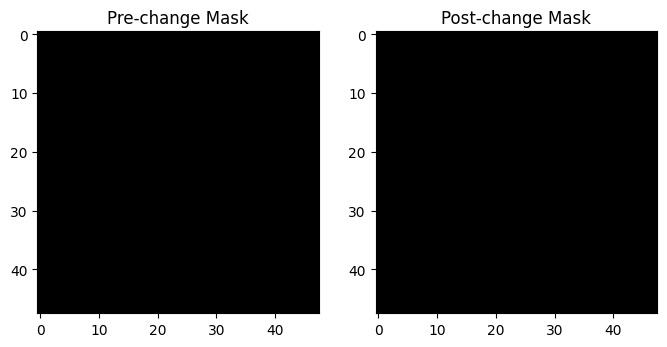

In [10]:
sample10 = read_sample(25984)
keys = list(sample10.keys())
print(f"KEYS in each sample: {keys}")
print("---------------------------------")
image10 = sample10["image"]
label10 = sample10["label"]
# Visualize pre & post change masks
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(label10[0], cmap='gray')
plt.title("Pre-change Mask")
plt.subplot(1,2,2)
plt.imshow(label10[1], cmap='gray')
plt.title("Post-change Mask")
plt.show()

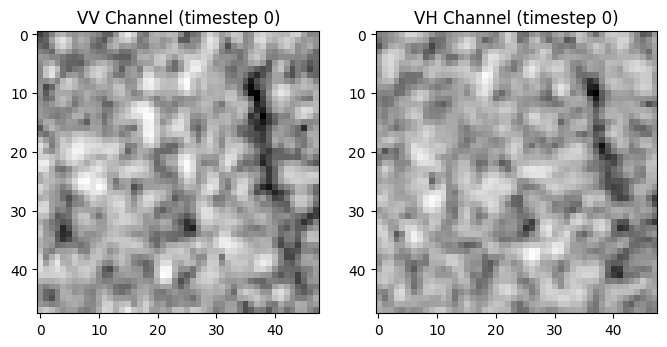

In [9]:
#visualizing a timestep from sample 1
timestep = 30
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image0[timestep,0], cmap='gray')
plt.title("VV Channel (timestep 0)")
plt.subplot(1,2,2)
plt.imshow(image0[timestep,1], cmap='gray')
plt.title("VH Channel (timestep 0)")
plt.show()

In [10]:
print("Image stats:")
print("Min:", image0.min().item())
print("Max:", image0.max().item())
print("Mean:", image0.float().mean().item())
print("Std:", image0.float().std().item())

Image stats:
Min: -34.080101013183594
Max: 1.2113221883773804
Mean: -11.255440711975098
Std: 4.104265213012695



Sample 0: Image shape torch.Size([31, 2, 48, 48]), Label shape torch.Size([2, 48, 48])


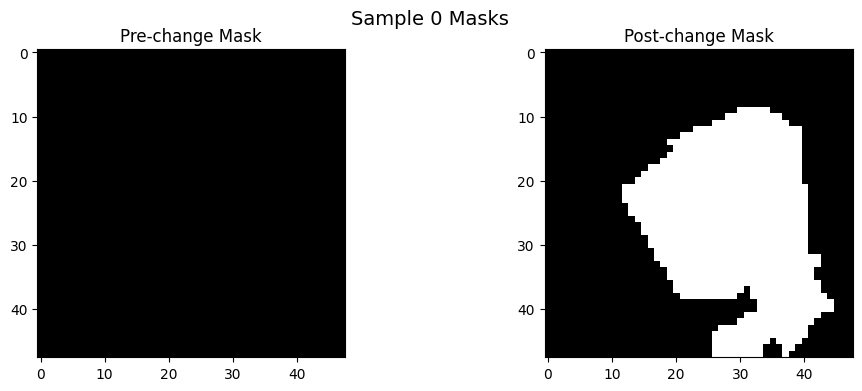

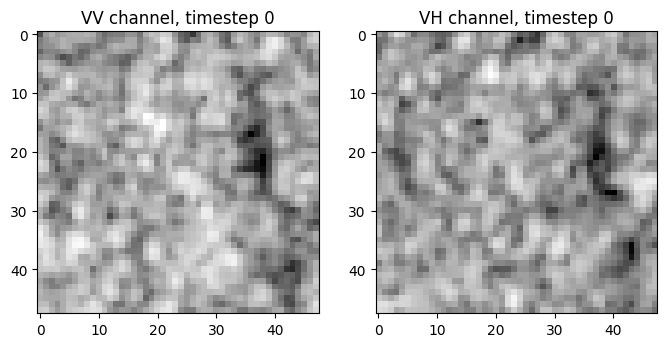

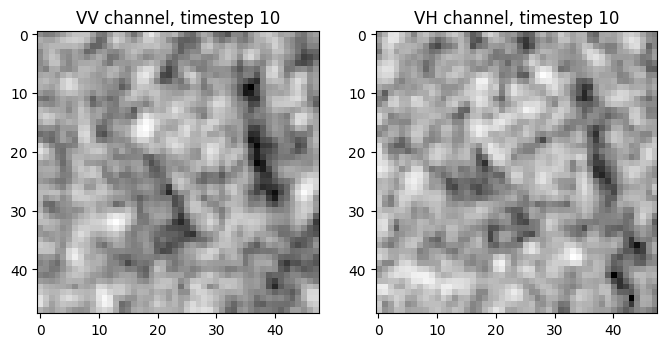

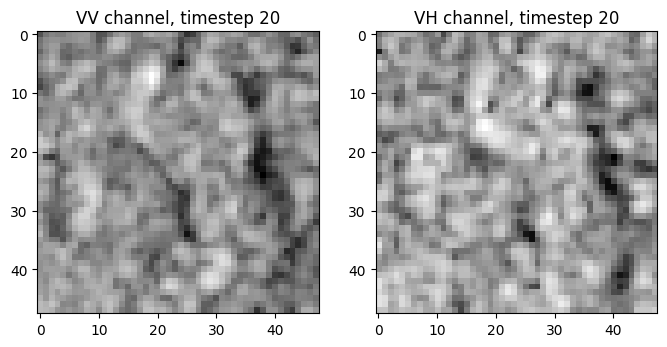


Sample 1: Image shape torch.Size([25, 2, 48, 48]), Label shape torch.Size([2, 48, 48])


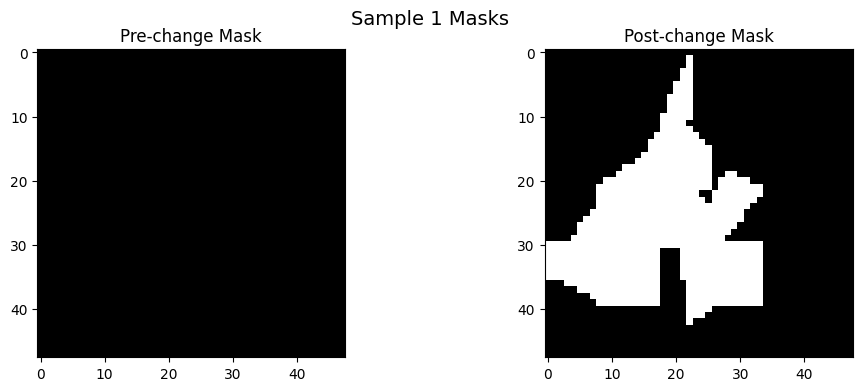

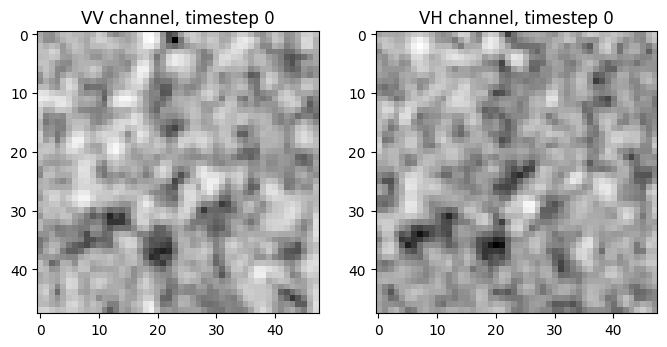

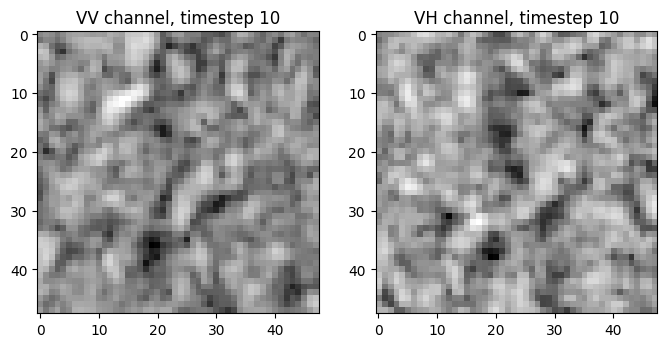

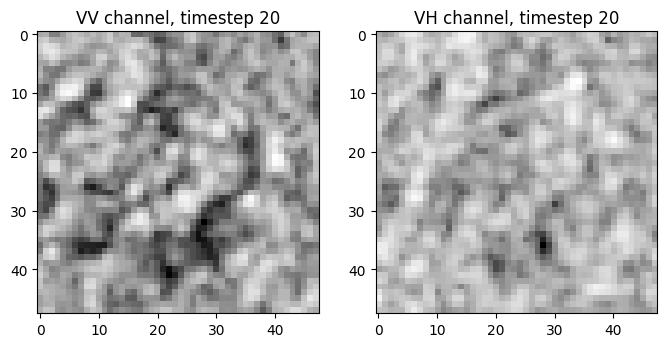


Sample 2: Image shape torch.Size([33, 2, 48, 48]), Label shape torch.Size([2, 48, 48])


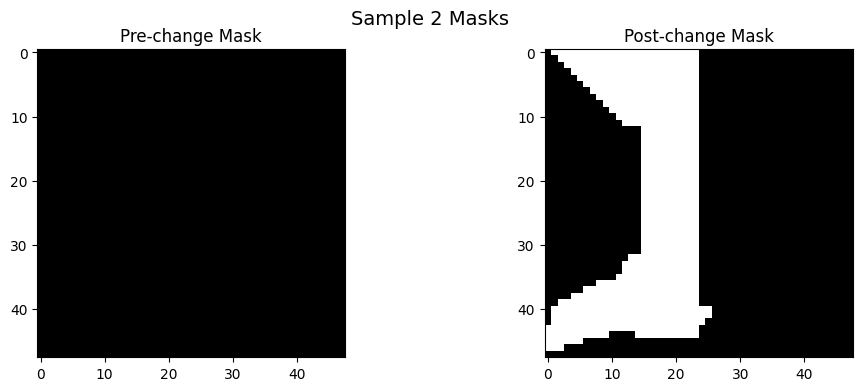

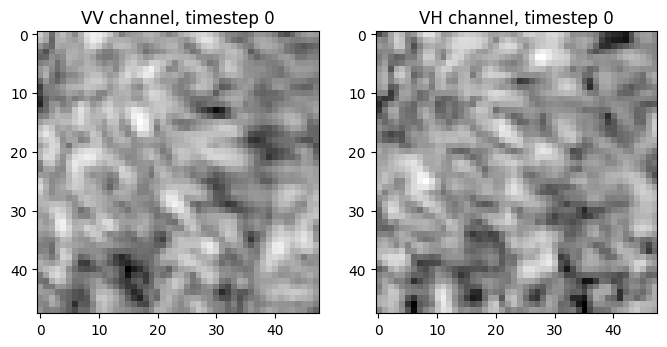

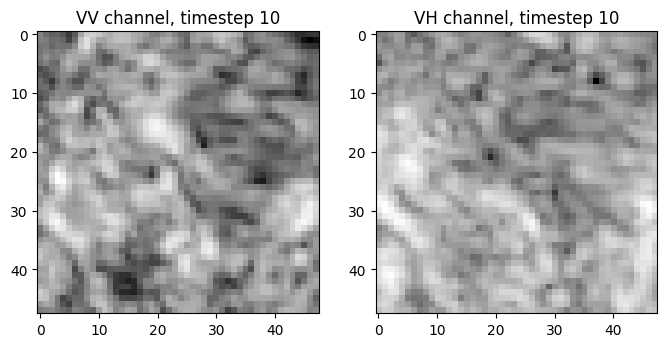

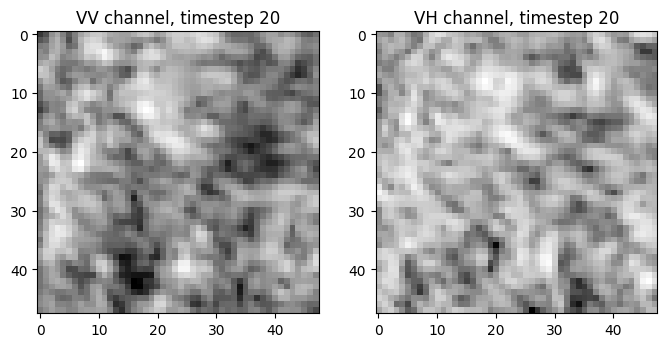

In [11]:
num_samples_to_visualize = 3
timesteps_to_plot = [0, 10, 20]

for idx in range(num_samples_to_visualize):
    sample = read_sample(idx)
    images = sample['image']   #(timesteps, 2, 48, 48)
    labels = sample['label']   #(2, 48, 48)

    print(f"\nSample {idx}: Image shape {images.shape}, Label shape {labels.shape}")

    plt.figure(figsize=(12,4))
    plt.suptitle(f"Sample {idx} Masks", fontsize=14)
    plt.subplot(1,2,1)
    plt.imshow(labels[0], cmap='gray')
    plt.title("Pre-change Mask")
    plt.subplot(1,2,2)
    plt.imshow(labels[1], cmap='gray')
    plt.title("Post-change Mask")
    plt.show()

    # Plot selected timesteps for VV/VH channels
    for t in timesteps_to_plot:
        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        plt.imshow(images[t,0], cmap='gray')
        plt.title(f"VV channel, timestep {t}")
        plt.subplot(1,2,2)
        plt.imshow(images[t,1], cmap='gray')
        plt.title(f"VH channel, timestep {t}")
        plt.show()

In [12]:
num_samples_to_check = 5
changes_per_sample = []

for idx in range(num_samples_to_check):
    sample = read_sample(idx)
    labels = sample['label']
    # Count pixels where pre != post
    num_changed = torch.sum(labels[0] != labels[1]).item()
    changes_per_sample.append(num_changed)
    print(f"Sample {idx}: {num_changed} pixels changed")

Sample 0: 789 pixels changed
Sample 1: 653 pixels changed
Sample 2: 641 pixels changed
Sample 3: 577 pixels changed
Sample 4: 514 pixels changed


Still Forest (0->0): 3166 pixels, 68.71%
Deforest (0->1): 1442 pixels, 31.29%
Reforest (1->0): 0 pixels, 0.00%
Still Deforest (1->1): 0 pixels, 0.00%


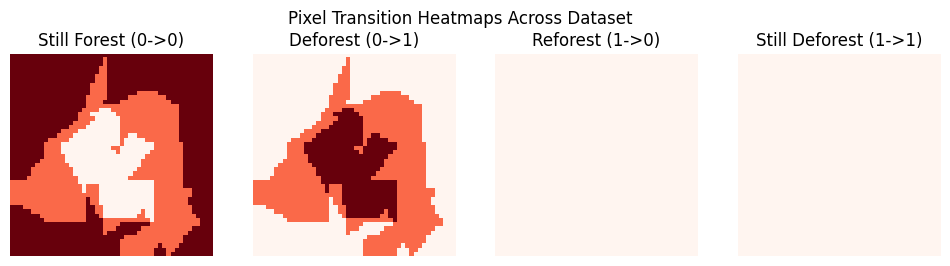

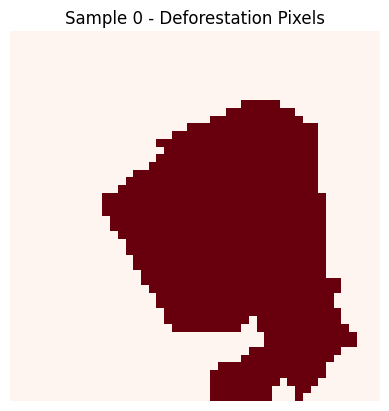

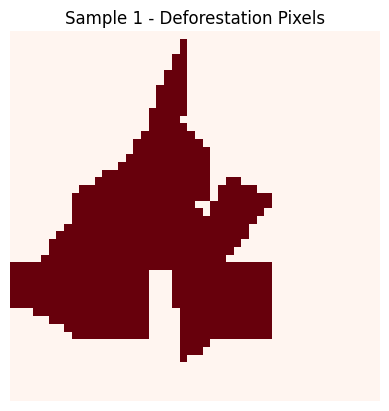

In [13]:
total_sample = 2
transition_names = ['Still Forest (0->0)', 'Deforest (0->1)', 'Reforest (1->0)', 'Still Deforest (1->1)']


transition_counts = torch.zeros(4, dtype=torch.int)
heatmaps = [torch.zeros((48,48), dtype=torch.int) for _ in range(4)]


for idx in range(total_sample):
    sample = read_sample(idx)
    old_mask = sample['label'][0].long()  # pre-change
    new_mask = sample['label'][1].long()  # post-change

    # Encode transitions: 0->0=0, 0->1=1, 1->0=2, 1->1=3
    transition_values = new_mask + old_mask * 2

    for i in range(4):
        transition_counts[i] += (transition_values == i).sum()
        heatmaps[i] += (transition_values == i).int()


total_pixels = transition_counts.sum().item()
for i, name in enumerate(transition_names):
    print(f"{name}: {transition_counts[i].item()} pixels, "
          f"{transition_counts[i].item()/total_pixels*100:.2f}%")


plt.figure(figsize=(12,3))
for i, name in enumerate(transition_names):
    plt.subplot(1,4,i+1)
    plt.imshow(heatmaps[i], cmap='Reds')
    plt.title(name)
    plt.axis('off')
plt.suptitle("Pixel Transition Heatmaps Across Dataset")
plt.show()


for idx in range(total_sample):
    sample = read_sample(idx)
    old_mask = sample['label'][0]
    new_mask = sample['label'][1]
    deforest_mask = (old_mask == 0) & (new_mask == 1)

    plt.figure()
    plt.imshow(deforest_mask, cmap='Reds')
    plt.title(f"Sample {idx} - Deforestation Pixels")
    plt.axis('off')
    plt.show()

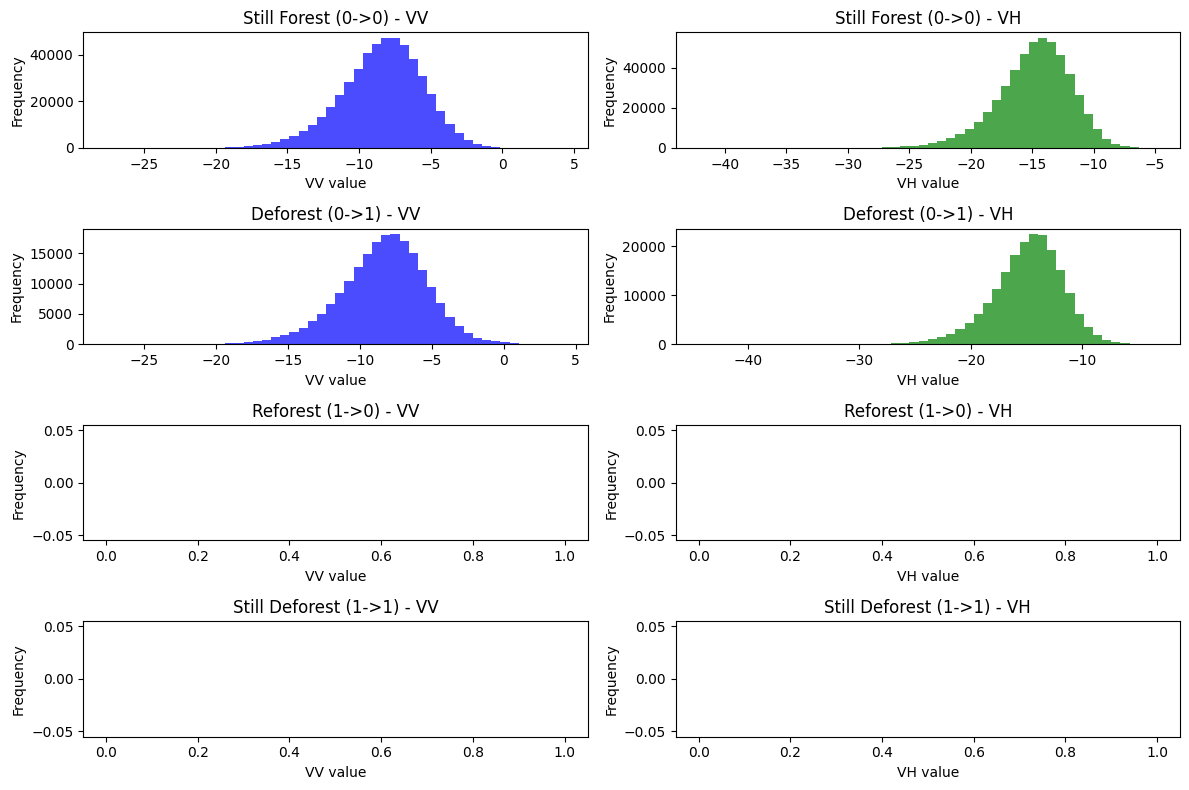

In [14]:
total_sample = 10

num_bins = 50  # histogram bins
vv_histograms = [ [] for _ in range(4) ]  # one list per transition
vh_histograms = [ [] for _ in range(4) ]

for idx in range(total_sample):
    sample = read_sample(idx)
    old_mask = sample['label'][0]
    new_mask = sample['label'][1]
    images = sample['image']  # shape: (timesteps, 2, 48, 48)

    # Encode transitions
    transition_values = new_mask + old_mask * 2

    # Flatten timesteps and spatial dims for VV/VH channels
    for t in range(images.shape[0]):
        vv = images[t,0,:,:].flatten()
        vh = images[t,1,:,:].flatten()
        for i in range(4):
            mask = (transition_values == i).flatten()
            vv_histograms[i].extend(vv[mask].tolist())
            vh_histograms[i].extend(vh[mask].tolist())

# Plot histograms
plt.figure(figsize=(12,8))
for i, name in enumerate(transition_names):
    plt.subplot(4,2,2*i+1)
    plt.hist(vv_histograms[i], bins=num_bins, color='blue', alpha=0.7)
    plt.title(f"{name} - VV")
    plt.xlabel("VV value")
    plt.ylabel("Frequency")

    plt.subplot(4,2,2*i+2)
    plt.hist(vh_histograms[i], bins=num_bins, color='green', alpha=0.7)
    plt.title(f"{name} - VH")
    plt.xlabel("VH value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


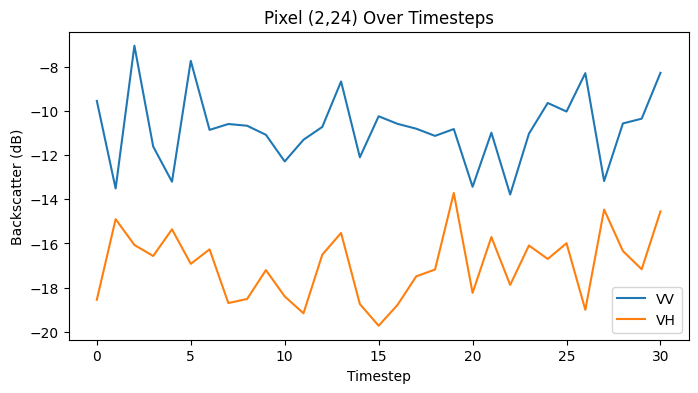

In [15]:
px, py = 2, 24
vv_ts = sample0['image'][:, 0, px, py].numpy()
vh_ts = sample0['image'][:, 1, px, py].numpy()

plt.figure(figsize=(8,4))
plt.plot(vv_ts, label='VV')
plt.plot(vh_ts, label='VH')
plt.title(f"Pixel ({px},{py}) Over Timesteps")
plt.xlabel("Timestep")
plt.ylabel("Backscatter (dB)")
plt.legend()
plt.show()

In [16]:
#maybe useful for normalization step
vv_values, vh_values = [], []

for i in range(1000):
    sample = read_sample(i)
    vv_values.append(sample['image'][:,0,:,:].flatten())
    vh_values.append(sample['image'][:,1,:,:].flatten())

vv_values = torch.cat(vv_values)
vh_values = torch.cat(vh_values)

print("VV mean/std:", vv_values.mean().item(), vv_values.std().item())
print("VH mean/std:", vh_values.mean().item(), vh_values.std().item())

VV mean/std: -8.58741569519043 2.7872085571289062
VH mean/std: -14.955259323120117 2.904127836227417


In [17]:
#observing the correlation between vv and vh
sample = read_sample(0)
vv = sample['image'][:, 0, :, :].flatten()
vh = sample['image'][:, 1, :, :].flatten()
corr = torch.corrcoef(torch.stack([vv, vh]))[0,1]
print(f"VV–VH correlation: {corr:.3f}")

VV–VH correlation: 0.490


In [18]:
#ideas for data preperation --> selection, normalization, and augmentation.

In [19]:
len(meta_df)

25988

In [20]:
def has_deforestation(sample, threshold=0.01):
    label = sample['label'][1]
    return (label.sum() / label.numel()) > threshold

selected_indices = []
for i in range(len(meta_df)):
    sample = read_sample(i)
    if has_deforestation(sample):
        selected_indices.append(i)

print(f"Selected {len(selected_indices)} samples ({len(selected_indices)/len(meta_df)*100:.1f}% of dataset)")

Selected 11006 samples (42.4% of dataset)


In [21]:
# Sample 11006 and after all the post changel labels are ALL pixels of 0 (black boxes)! --> unchanged land 
# deforestation samples (idx = 0 to idx = 11005)
sample = read_sample(11006)
label = sample['label'][1]
label.sum() / label.numel()

tensor(0.)

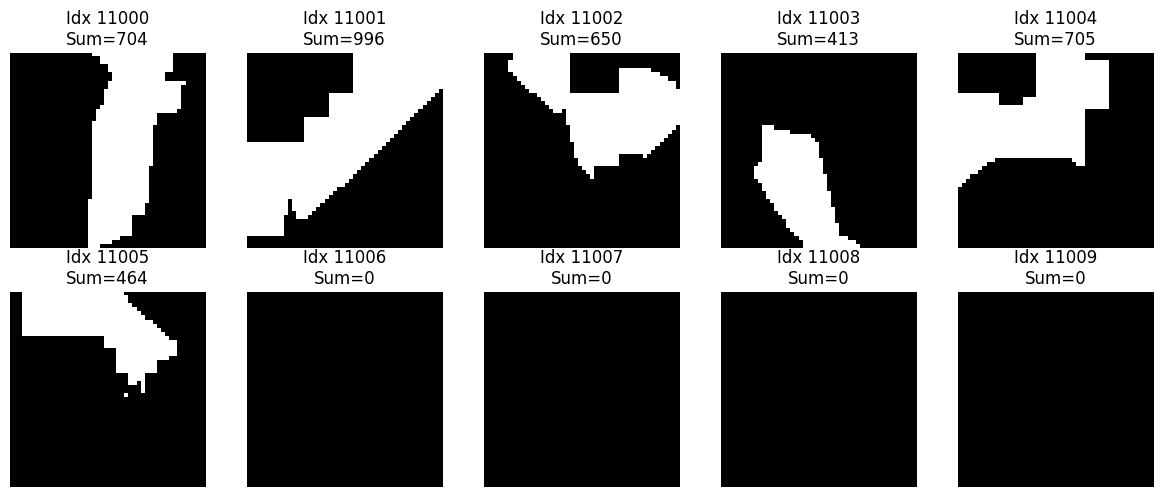

In [22]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
for j, idx in enumerate(range(11000,11010)):
    lbl = read_sample(idx)['label'][1]
    axes[j//5, j%5].imshow(lbl, cmap='gray')
    axes[j//5, j%5].set_title(f"Idx {idx}\nSum={lbl.sum():.0f}")
    axes[j//5, j%5].axis('off')
plt.tight_layout()
plt.show()

In [23]:
# DATA PREPERATION --> splitting
change_indices = []
nochange_indices = []

for i in range(len(meta_df)):
    lbl = read_sample(i)['label'][1]
    if lbl.sum() > 0:
        change_indices.append(i)
    else:
        nochange_indices.append(i)

print(f"Change samples: {len(change_indices)} | No-change samples: {len(nochange_indices)}")

Change samples: 11006 | No-change samples: 14982


In [26]:
# need to select subset of samples
import random
random.seed(42)

n_change = min(1000, len(change_indices))
n_nochange = min(1000, len(nochange_indices))

subset_change = random.sample(change_indices, n_change)
subset_nochange = random.sample(nochange_indices, n_nochange)

subset_indices = subset_change + subset_nochange
random.shuffle(subset_indices) 
# should be 2000 randomized samples, but need to figure out a way to fairly determine the split between change 
# and no change samples (right now 50% each)

In [40]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(subset_indices, test_size=0.2, random_state=42) 
train_idx, val_idx = train_test_split(train_idx, test_size=0.1, random_state=42) 
print(f"Train: {len(train_idx)} | Val: {len(val_idx)} | Test: {len(test_idx)}")

Train: 1440 | Val: 160 | Test: 400


In [41]:
# DATA PREPERATION --> normalization
# VV & VH channel values typically range from -50 to 0
min_value, max_value = -50.0, 0.0

def normalize_image(img):
    # img shape: (T, 2, 48, 48)
    return torch.clamp((img - min_value) / (max_value - min_value), 0.0, 1.0)

In [42]:
# DATA PREPERATION --> augmentation
import torchvision.transforms.functional as TF

def augment_sample(image, label):
    # Random horizontal/vertical flips
    if torch.rand(1) < 0.5:
        image = TF.hflip(image)
        label = TF.hflip(label)
    if torch.rand(1) < 0.5:
        image = TF.vflip(image)
        label = TF.vflip(label)

    # Add small Gaussian noise
    noise = torch.randn_like(image) * 0.01
    image = image + noise

    return image, label

In [43]:
from torch.utils.data import Dataset

class BRADS1T_Dataset(Dataset):
    def __init__(self, indices, augment=False):
        self.indices = indices
        self.augment = augment

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, i):
        sample = read_sample(self.indices[i])
        image = normalize_image(sample['image'])
        label = sample['label'][1].float()  # post-change mask

        if self.augment:
            image, label = augment_sample(image, label)

        return image, label

In [44]:
from torch.utils.data import DataLoader

train_ds = BRADS1T_Dataset(train_idx, augment=True)
val_ds   = BRADS1T_Dataset(val_idx)
test_ds  = BRADS1T_Dataset(test_idx)

train_loader = DataLoader(train_ds, batch_size=4, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=4)

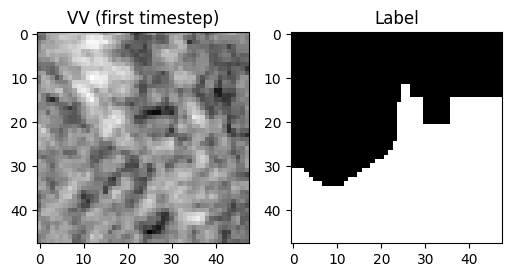

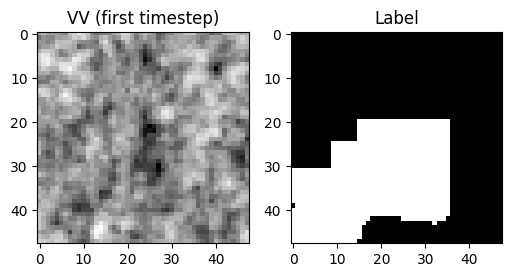

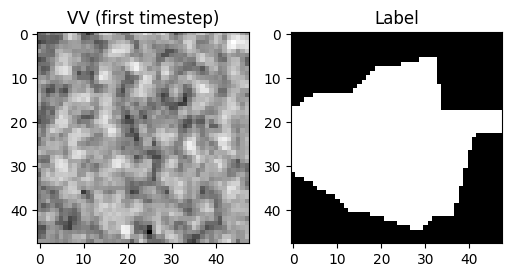

In [46]:
for i in range(3):
    img, lbl = train_ds[i]
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(img[0,0,:,:], cmap='gray')  # VV channel
    plt.title('VV (first timestep)')
    plt.subplot(1,2,2)
    plt.imshow(lbl, cmap='gray')
    plt.title('Label')
    plt.show()